<h3>引入</h4>

In [248]:
import numpy as np
import scipy
from scipy.fft import fft
from scipy.signal import stft
import tensorflow as tf
import matplotlib.pyplot as plt

<h3>生成RGB图像(UAV论文)</h3>
<h5 style = "color: yellow">数据引入</h5>

In [249]:
data = scipy.io.loadmat('dataset.mat')
channelA_data = data['echoes']['channelA']  # 形状为 (150, 6000)
channelB_data = data['echoes']['channelB']  # 形状为 (150, 6000)
dataset = np.hstack((channelA_data, channelB_data)).T
dataset = tf.cast(dataset[0][0], tf.complex64)
dataset

<tf.Tensor: shape=(150, 6000), dtype=complex64, numpy=
array([[-0.01367188-0.23510742j, -0.01391602-0.23364258j,
        -0.01391602-0.23535156j, ..., -0.02392578-0.24047852j,
        -0.02416992-0.2409668j , -0.02490234-0.24169922j],
       [-0.01074219-0.24438477j, -0.01025391-0.2434082j ,
        -0.01171875-0.24511719j, ..., -0.02416992-0.24951172j,
        -0.02441406-0.2487793j , -0.02514648-0.2487793j ],
       [-0.01806641-0.23046875j, -0.01806641-0.22851562j,
        -0.01928711-0.23022461j, ..., -0.02880859-0.23730469j,
        -0.02978516-0.2368164j , -0.02929688-0.23706055j],
       ...,
       [-0.02050781-0.21948242j, -0.01928711-0.22045898j,
        -0.01831055-0.22094727j, ..., -0.01635742-0.23022461j,
        -0.01660156-0.22998047j, -0.01831055-0.23071289j],
       [-0.03149414-0.22631836j, -0.03125   -0.2277832j ,
        -0.03100586-0.22851562j, ..., -0.03271484-0.23657227j,
        -0.03271484-0.23730469j, -0.03466797-0.23754883j],
       [-0.02441406-0.21948242j, 

In [250]:
# 定义复数到实数的转换函数
def complex_to_real(complex_data):
 # 将复数转换为实部和虚部
 real_part = np.real(complex_data)
 imag_part = np.imag(complex_data)

 # 将实部和虚部堆叠成新的数组
 real_imag_stack = np.stack([real_part, imag_part], axis=-1)
 print(real_imag_stack.shape)

 return real_imag_stack

<h5 style = "color: blue">数据融合</h5>

In [251]:
# 数据融合函数
def data_fusion(real_part, rd_spectrum, tf_spectrum):

    '''
    # 将雷达原始信号、RD谱图和TF谱图转换为实数表示
    radar_raw_real = complex_to_real(real_part)
    rd_spectrum_real = complex_to_real(rd_spectrum)
    tf_spectrum_real = complex_to_real(tf_spectrum)
    '''

    # 归一化处理
    radar_raw_norm = real_part / np.max(np.abs(real_part))
    rd_spectrum_norm = rd_spectrum / np.max(np.abs(rd_spectrum))
    tf_spectrum_norm = tf_spectrum / np.max(np.abs(tf_spectrum))

    print(radar_raw_norm.shape, rd_spectrum_norm.shape, tf_spectrum_norm.shape)

    # 调整尺寸到227x227
    radar_raw_resized = np.resize(radar_raw_norm, (227, 227))
    rd_spectrum_resized = np.resize(rd_spectrum_norm, (227, 227))
    tf_spectrum_resized = np.resize(tf_spectrum_norm, (227, 227))
    
    print(radar_raw_resized.shape, rd_spectrum_resized.shape, tf_spectrum_resized.shape)

    # 合成到RGB三个通道
    fused_image = np.concatenate([radar_raw_resized[:,:,np.newaxis], rd_spectrum_resized[:,:,np.newaxis], tf_spectrum_resized[:,:,np.newaxis]], axis = 2)
    print(fused_image.shape)

    return fused_image

<h5 style = "color: blue">傅里叶和短时傅里叶变换</h5>

In [252]:

 # 将复数转换为实部和虚部
real_part = np.real(dataset)
imag_part = np.imag(dataset)
print(real_part.shape, '\n 23333: \n', imag_part.shape)

# 计算距离-多普勒谱图（RD谱图）
# 对整个数组进行傅里叶变换
rd_spectrum = np.abs(fft(dataset))

# 计算时频谱图（TF谱图）
# 使用短时傅里叶变换（STFT）计算时频特征
f, t, stft_result = stft(dataset, nperseg = 150)

# 计算幅度谱
tf_spectrum = np.abs(stft_result)
print(rd_spectrum.shape, tf_spectrum.shape)

 # 将实部和虚部堆叠成新的数组
real_imag_stack = np.stack([real_part, imag_part], axis=-1)

(150, 6000) 
 23333: 
 (150, 6000)
(150, 6000) (150, 150, 81)


C:\Users\47391\AppData\Local\Temp\ipykernel_12060\2886007511.py:12: UserWarning: Input data is complex, switching to return_onesided=False
  f, t, stft_result = stft(dataset, nperseg = 150)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.30569106..1.0].


(150, 6000) (150, 6000) (150, 150, 81)
(227, 227) (227, 227) (227, 227)
(227, 227, 3)


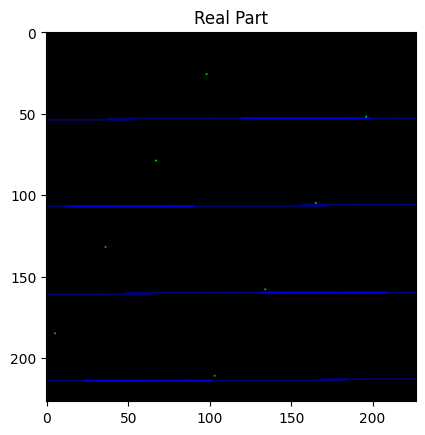

In [253]:
# 将复数转换为实部和虚部
real_part = np.real(dataset)
imag_part = np.imag(dataset)
fused_data = data_fusion(real_part, rd_spectrum, tf_spectrum)

# 显示实部图像
plt.imshow(fused_data)
plt.title("Real Part")
plt.show()